<a href="https://colab.research.google.com/github/MachineSaver/MachineSaver/blob/main/Machine_Saver_Web_Portal_API_Integration_Examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Saver Web Portal Integration Examples

[Read the API Documentation](https://www.bipom.com/documents/WiPOM/WRTU%20Web%20Portal%20API.pdf)

In [ ]:
from typing import Optional, List, Dict
import pandas as pd
import requests
from typing import List, Dict, Union, Optional, Tuple, Any
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
import logging

# Get Your Authorization Token

In [ ]:
def get_auth_token(username: str, password: str) -> str:
  """Login to Machine Saver API and retrieve access token."""
  url = "https://api.portal.machinesaver.com/v1/Login"
  data = {
      'grant_type': 'password',
      'username': username,  # Replace with actual username
      'password': password   # Replace with actual password
  }

  response = requests.post(url, data=data)

  if response.status_code == 200:
      token_data = response.json()
      access_token = token_data.get('access_token')
      return access_token
  else:
      print(f"Failed to login: {response.status_code} - {response.text}")
      return None

In [ ]:
access_token = get_auth_token('Generic_Demo', 'Nf!Ut9gCTPhaUv')

In [ ]:
print(access_token)

BvyWyVkaXKII77SX0VCzzH7zeaMdEroJOYk-Sh3heTe3rKe9nVvBqtFu1OlHOsrLjDAuSvHUiCa_iw5dtcH_SyKMjfCdObBRq-MK0ilp1hP9Y-gGLNCd5SapQhYO1bFME4FHw_ksd1WvgEsGxqkqbWfnqtO5NLAn4Pud6YFY5ZqpmXtPR1eh7L9ipenp-4oaPI5B-IuVzFupQOwzicSHpWgyPp94KeEuQrzMotyxPiSk7aJPnLmhAqGDd46WViLLTShzYH1Y1YhUeCla4T6vwWVylMlCf8zM2Wjt9wPuhywbI-y2dPIBOdUNjVjI_fLlqv0_m4oaDxNJpzJArgRyYKjMyeRVzyanWN-yjXxgw9b-vq1z4PBDIgYEZ2N90N2_t6cnq83P5gg8v_nTeQ-c2bM129M


# Get Accounts List

In [ ]:
def get_accounts_list(access_token: str) -> dict:
    """Get accounts list from Machine Saver API."""
    url = "https://api.portal.machinesaver.com/v1/AccountsList"
    headers = {'Authorization': f'Bearer {access_token}'}

    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to fetch accounts: {response.status_code} - {response.text}")
        return None

In [ ]:
account_list = get_accounts_list(access_token)

In [ ]:
print(account_list)

[]


# Get Device List

In [ ]:
def get_devices_list(access_token: str) -> dict:
    """Get devices list from Machine Saver API."""
    url = "https://api.portal.machinesaver.com/v1/DevicesList"
    headers = {'Authorization': f'Bearer {access_token}'}

    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to fetch devices list: {response.status_code} - {response.text}")
        return None

In [ ]:
device_list = get_devices_list(access_token)

In [ ]:
print(device_list)

[{'Id': 1229, 'AccountId': 441, 'Serial': 'KM4AP5A988', 'IsActive': True, 'IPAddress': '10.11.0.210;166.146.188.63', 'CreateAt': '2024-08-13T17:18:19.967', 'CreatedbyUser': 110, 'IsCGVtbCom': False, 'DeviceName': 'Cloudgate Mini'}]


# Get Sensor List Using Gateway ID

In [ ]:
def get_sensors_list(device_id: int, access_token: str) -> dict:
    """Get sensors list for a specific device from Machine Saver API."""
    url = f"https://api.portal.machinesaver.com/v1/SensorsList?deviceId={device_id}"
    headers = {'Authorization': f'Bearer {access_token}'}

    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to fetch sensor data: {response.status_code} - {response.text}")
        return None

In [ ]:
sensor_list = get_sensors_list(1229, access_token)

Failed to fetch sensor data: 404 - {
  "Message": "No HTTP resource was found that matches the request URI 'https://api.portal.machinesaver.com/v1/SensorsList?deviceId=1229'.",
  "MessageDetail": "No type was found that matches the controller named 'SensorsList'."
}


In [ ]:
print(sensor_list)

None


# Get Data Tags Using Device ID

In [ ]:
def get_tags_list(device_id: int, access_token: str) -> dict:
    """Get tags list for a specific device from Machine Saver API."""
    url = f"https://api.portal.machinesaver.com/v1/TagsList?deviceId={device_id}"
    headers = {'Authorization': f'Bearer {access_token}'}

    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to fetch tag list: {response.status_code} - {response.text}")
        return None

In [ ]:
tag_list = get_tags_list(1229, access_token)

In [ ]:
print(tag_list)

[{'Id': 1133749, 'IsActive': True, 'DeviceId': 1229, 'Name': '8C1F642113000010 - Acceleration Axis 1', 'Type': 'DS', 'Address': 0, 'VirtualAddress': 0, 'Units1': 'g', 'Units2': '', 'LogPeriod': 0, 'MBRtu': 0, 'MBType': None, 'MBAddress': 0, 'MBValueType': None, 'MBValueByteOrder': None, 'IsVMapEnabled': False, 'IsBMapEnabled': False, 'VMapPresent': False, 'BMapPresent': False, 'MaxLoggedAt': None, 'RecordsNumber': 0}, {'Id': 1133750, 'IsActive': True, 'DeviceId': 1229, 'Name': '8C1F642113000010 - Acceleration Axis 2', 'Type': 'DS', 'Address': 0, 'VirtualAddress': 0, 'Units1': 'g', 'Units2': '', 'LogPeriod': 0, 'MBRtu': 0, 'MBType': None, 'MBAddress': 0, 'MBValueType': None, 'MBValueByteOrder': None, 'IsVMapEnabled': False, 'IsBMapEnabled': False, 'VMapPresent': False, 'BMapPresent': False, 'MaxLoggedAt': None, 'RecordsNumber': 0}, {'Id': 1133751, 'IsActive': True, 'DeviceId': 1229, 'Name': '8C1F642113000010 - Acceleration Axis 3', 'Type': 'DS', 'Address': 0, 'VirtualAddress': 0, 'Units

# Get Tag Information

In [ ]:
def get_tag_info(tag_id: int, access_token: str) -> dict:
    """Get tag information from Machine Saver API."""
    url = f"https://api.portal.machinesaver.com/v1/TagInfo"
    headers = {'Authorization': f'Bearer {access_token}'}
    params = {'Id': tag_id}

    response = requests.get(url, headers=headers, params=params)

    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error: {response.status_code} - {response.text}")
        return None

In [ ]:
tag_info = get_tag_info(1133752, access_token)

In [ ]:
print(tag_info)

{'Id': 1133752, 'IsActive': True, 'DeviceId': 1229, 'Name': '8C1F642113000010 - Temperature', 'Type': 'HR', 'Address': 40200, 'VirtualAddress': 0, 'Units1': 'C', 'Units2': '', 'LogPeriod': 60, 'MBRtu': 0, 'MBType': None, 'MBAddress': 0, 'MBValueType': None, 'MBValueByteOrder': None, 'IsVMapEnabled': False, 'IsBMapEnabled': False, 'VMapPresent': False, 'BMapPresent': False, 'MaxLoggedAt': '2024-10-24T13:45:04.000', 'RecordsNumber': 13734}


Notes on the data below for the AirVibe Sensor:

Values that end in (RMS) and are of the type "HOLD" are the overall vibration data, which is typically used by operators to indicate that there is a problem an increased vibration, this is what is trended when we [Plot Tag Data](https://colab.research.google.com/github/MachineSaver/MachineSaver/blob/main/Machine_Saver_Web_Portal_API_Integration_Examples.ipynb#scrollTo=lLy-64d0vIXq&line=6&uniqifier=1)

Values that do not end in (RMS) and are of the type "DS" are the analysis vibration data (aka waveform, aka spectra), which is typically used by a vibration analyst or anomaly detection algorithm to tell you more specifically which component of a machine has increased vibration (such as a bearing) this is what is used when we [Plot Snapshot Data](https://colab.research.google.com/github/MachineSaver/MachineSaver/blob/main/Machine_Saver_Web_Portal_API_Integration_Examples.ipynb#scrollTo=rqbjauvmoDu-&line=23&uniqifier=1)

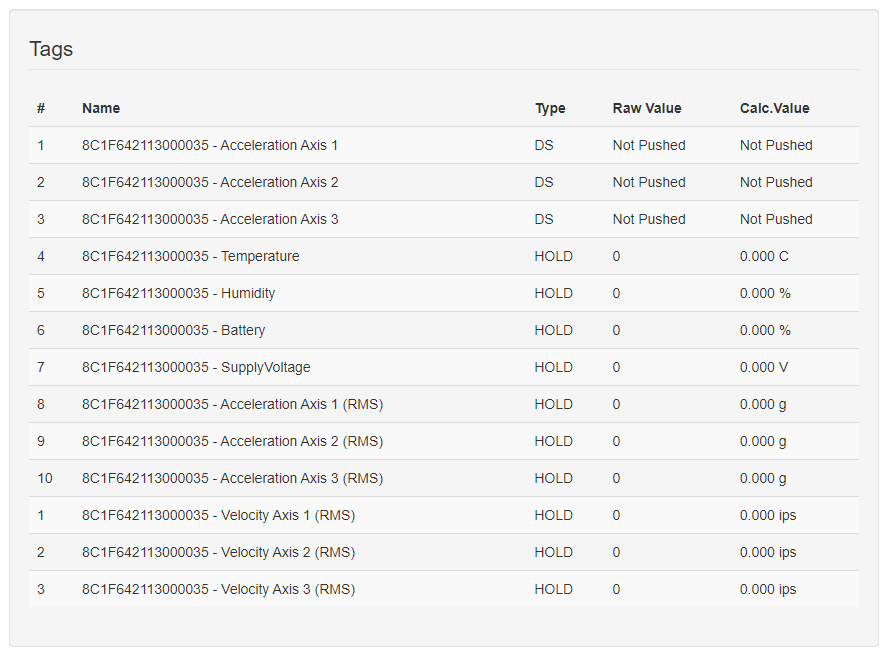

# Get Tag Data From a Specific Time

In [ ]:
def get_tag_data(tag_id: int,
                  access_token: str,
                  start_time: Optional[str] = None,
                  end_time: Optional[str] = None) -> List[Dict]:
    """Fetch tag data from Machine Saver API."""

    url = f"https://api.portal.machinesaver.com/v1/TagData"
    headers = {'Authorization': f'Bearer {access_token}'}

    params = {'tagId': tag_id}
    if start_time:
        params['startTime'] = start_time
    if end_time:
        params['endTime'] = end_time

    try:
        response = requests.get(url, headers=headers, params=params)
        response.raise_for_status()
        return response.json()
    except Exception as e:
        print(f"Error: {response.status_code} - {response.text}")
        return None

In [ ]:
tag_data = get_tag_data(tag_id=1133758, access_token=access_token, start_time="10-23-2024 00:00:00", end_time="10-23-2024 01:00:00")

In [ ]:
print(tag_data)

[{'Id': 837628427, 'LogId': 1729202283, 'LoggedAt': '2024-10-23T00:00:17.000', 'RawValue': 1.541428e-44, 'CalcValue': 0.011, 'TextValue': None}, {'Id': 837628541, 'LogId': 1729202303, 'LoggedAt': '2024-10-23T00:01:17.000', 'RawValue': 1.541428e-44, 'CalcValue': 0.011, 'TextValue': None}, {'Id': 837628937, 'LogId': 1729202323, 'LoggedAt': '2024-10-23T00:02:17.000', 'RawValue': 1.541428e-44, 'CalcValue': 0.011, 'TextValue': None}, {'Id': 837629028, 'LogId': 1729202343, 'LoggedAt': '2024-10-23T00:03:17.000', 'RawValue': 1.541428e-44, 'CalcValue': 0.011, 'TextValue': None}, {'Id': 837629132, 'LogId': 1729202363, 'LoggedAt': '2024-10-23T00:04:17.000', 'RawValue': 1.541428e-44, 'CalcValue': 0.011, 'TextValue': None}, {'Id': 837629217, 'LogId': 1729202383, 'LoggedAt': '2024-10-23T00:05:17.000', 'RawValue': 1.541428e-44, 'CalcValue': 0.011, 'TextValue': None}, {'Id': 837629325, 'LogId': 1729202403, 'LoggedAt': '2024-10-23T00:06:17.000', 'RawValue': 1.541428e-44, 'CalcValue': 0.011, 'TextValue'

# Plot Tag Data

In [ ]:
def set_machine_saver_theme():
    """Set up the Machine Saver plotly theme."""
    pio.templates["draft"] = go.layout.Template(
        layout_annotations=[
            dict(
                name="draft watermark",
                text="Machine Saver Inc.",
                textangle=-30,
                opacity=0.1,
                font=dict(color="white", size=50),
                xref="paper",
                yref="paper",
                x=0.5,
                y=0.5,
                showarrow=True,
            )
        ]
    )
    pio.templates.default = "plotly_dark+draft"

def get_trace_color(name: str) -> str:
    """
    Determine the color for a trace based on the axis name.

    Args:
        name (str): The name of the trace containing axis information

    Returns:
        str: Hex color code for the trace
    """
    if "axis 1" in name.lower():
        return "#4CC9FE"
    elif "axis 2" in name.lower():
        return "#FFF100"
    elif "axis 3" in name.lower():
        return "#D91656"
    return "#808080"  # Default color for unmatched names

def get_measurement_type(tag_name: str) -> Optional[str]:
    """
    Determine the measurement type from the tag name.

    Args:
        tag_name (str): Name of the tag

    Returns:
        Optional[str]: Measurement type if matched, None otherwise
    """
    tag_name_lower = tag_name.lower()
    if "velocity" in tag_name_lower:
        return "velocity"
    elif "acceleration" in tag_name_lower:
        return "acceleration"
    elif "temperature" in tag_name_lower:
        return "temperature"
    return None

def fetch_and_process_data(
    tag_ids: Union[int, List[int]],
    access_token: str,
    start_time: Optional[str] = None,
    end_time: Optional[str] = None
) -> Dict[str, List[Tuple[str, pd.DataFrame]]]:
    """
    Fetch and process data for multiple tags, grouping by measurement type.

    Args:
        tag_ids: Single tag ID or list of tag IDs
        access_token: API access token
        start_time: Optional start time for data range
        end_time: Optional end time for data range

    Returns:
        Dict mapping measurement types to lists of (tag_name, dataframe) tuples
    """
    if isinstance(tag_ids, int):
        tag_ids = [tag_ids]

    grouped_data = {}

    for tag_id in tag_ids:
        # Get tag info
        tag_info = get_tag_info(tag_id, access_token)
        if not tag_info:
            continue

        tag_name = tag_info['Name']
        measurement_type = get_measurement_type(tag_name)
        if not measurement_type:
            continue

        # Get tag data
        raw_data = get_tag_data(tag_id, access_token, start_time, end_time)
        if not raw_data:
            continue

        # Convert to DataFrame
        df = pd.DataFrame(raw_data)
        df['LoggedAt'] = pd.to_datetime(df['LoggedAt'])

        # Group by measurement type
        if measurement_type not in grouped_data:
            grouped_data[measurement_type] = []
        grouped_data[measurement_type].append((tag_name, df))

    return grouped_data

def create_measurement_plots(
    tag_ids: Union[int, List[int]],
    access_token: str,
    start_time: Optional[str] = None,
    end_time: Optional[str] = None
) -> List[go.Figure]:
    """
    Create separate plots for each measurement type (velocity, acceleration, temperature).

    Args:
        tag_ids: Single tag ID or list of tag IDs
        access_token: API access token
        start_time: Optional start time for data range
        end_time: Optional end time for data range

    Returns:
        List[go.Figure]: List of plotly figures, one for each measurement type
    """
    # Fetch and group data
    grouped_data = fetch_and_process_data(tag_ids, access_token, start_time, end_time)

    figures = []
    set_machine_saver_theme()

    # Create a plot for each measurement type
    for measurement_type, data_list in grouped_data.items():
        fig = go.Figure()

        # Add traces for each tag in this measurement group
        for tag_name, df in data_list:
            fig.add_trace(
                go.Scatter(
                    x=df['LoggedAt'],
                    y=df['CalcValue'],
                    name=tag_name,
                    mode='lines',
                    line=dict(color=get_trace_color(tag_name)),
                    hovertemplate=(
                        f'{tag_name}<br>' +
                        'Time: %{x}<br>' +
                        'Value: %{y}<br><extra></extra>'
                    )
                )
            )

        # Update layout
        fig.update_layout(
            title=f'{measurement_type.title()} Time Series',
            xaxis_title="Time",
            yaxis_title=f"{measurement_type.title()} Value",
            hovermode='x unified',
            showlegend=True,
            legend=dict(
                yanchor="top",
                y=0.99,
                xanchor="left",
                x=0.01
                ),
            hoverlabel=dict(
                bgcolor="rgb(50, 50, 50)",
                font_size=16,
                font_family="Arial"
                ),
            plot_bgcolor='rgba(17, 17, 17, 0.9)',
            paper_bgcolor='rgba(17, 17, 17, 0.9)'
        )

        # Update axes
        fig.update_xaxes(gridcolor='rgba(128,128,128,0.2)', zeroline=True)
        fig.update_yaxes(gridcolor='rgba(128,128,128,0.2)', zeroline=True)

        figures.append(fig)

    return figures

In [ ]:
tag_ids = [1133752, 1133753, 1133754, 1133755, 1133756, 1133757, 1133758, 1133759, 1133760, 1133761]  # Replace with actual tag IDs
access_token = access_token  # Replace with actual access token
start_time = '10-23-2024 00:00:00'  # Replace with actual start time
end_time = '10-23-2024 00:30:00'  # Replace with actual end time

# Create plots for all measurement types
figures = create_measurement_plots(tag_ids, access_token, start_time, end_time)

# Display each figure
for fig in figures:
    fig.show()

# Get List of Data Snapshots

In [ ]:
def get_data_snapshots_list(device_id: int, access_token: str) -> dict:
    """Get data snapshots list for a specific device from Machine Saver API."""
    url = f"https://api.portal.machinesaver.com/v1/DatasnapshotsList?deviceId={device_id}"
    headers = {'Authorization': f'Bearer {access_token}'}

    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to fetch data snapshot list: {response.status_code} - {response.text}")
        return None

In [ ]:
snapshot_list = get_data_snapshots_list(1229, access_token)

In [ ]:
print(snapshot_list)

[{'Id': 5445, 'DeviceId': 1229, 'TagId': 1133749, 'Name': 'Acceleration Axis 1', 'XUnits': 'us', 'YUnits': 'g', 'Timestamp': '08/13/2024 19:19:27 (UTC)', 'XData': 'double[252]', 'YData': 'double[252]'}, {'Id': 5446, 'DeviceId': 1229, 'TagId': 1133750, 'Name': 'Acceleration Axis 2', 'XUnits': 'us', 'YUnits': 'g', 'Timestamp': '08/13/2024 19:19:27 (UTC)', 'XData': 'double[252]', 'YData': 'double[252]'}, {'Id': 5447, 'DeviceId': 1229, 'TagId': 1133751, 'Name': 'Acceleration Axis 3', 'XUnits': 'us', 'YUnits': 'g', 'Timestamp': '08/13/2024 19:19:27 (UTC)', 'XData': 'double[252]', 'YData': 'double[252]'}, {'Id': 5712, 'DeviceId': 1229, 'TagId': 1133749, 'Name': 'Acceleration Axis 1', 'XUnits': 'us', 'YUnits': 'g', 'Timestamp': '08/14/2024 14:32:04 (UTC)', 'XData': 'double[252]', 'YData': 'double[252]'}, {'Id': 5713, 'DeviceId': 1229, 'TagId': 1133750, 'Name': 'Acceleration Axis 2', 'XUnits': 'us', 'YUnits': 'g', 'Timestamp': '08/14/2024 14:32:04 (UTC)', 'XData': 'double[252]', 'YData': 'doub

# Get Snapshot Data from a Snapshot ID

In [ ]:
def get_data_snapshot_data(snapshot_id: int, access_token: str) -> dict:
    """Get data for a specific snapshot from Machine Saver API."""
    url = f"https://api.portal.machinesaver.com/v1/DatasnapshotData?Id={snapshot_id}"
    headers = {'Authorization': f'Bearer {access_token}'}

    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to fetch data snapshot: {response.status_code} - {response.text}")
        return None

In [ ]:
snapshot_data = get_data_snapshot_data(5446, access_token)

In [ ]:
print(snapshot_data)

{'Id': 5446, 'DeviceId': 1229, 'TagId': 1133750, 'Name': 'Acceleration Axis 2', 'XUnits': 'us', 'YUnits': 'g', 'Timestamp': '08/13/2024 19:19:27 (UTC)', 'XData': [0.0, 70.0, 140.0, 210.0, 280.0, 350.0, 420.0, 490.0, 560.0, 630.0, 700.0, 770.0, 840.0, 910.0, 980.0, 1050.0, 1120.0, 1190.0, 1260.0, 1330.0, 1400.0, 1470.0, 1540.0, 1610.0, 1680.0, 1750.0, 1820.0, 1890.0, 1960.0, 2030.0, 2100.0, 2170.0, 2240.0, 2310.0, 2380.0, 2450.0, 2520.0, 2590.0, 2660.0, 2730.0, 2800.0, 2870.0, 2940.0, 3010.0, 3080.0, 3150.0, 3220.0, 3290.0, 3360.0, 3430.0, 3500.0, 3570.0, 3640.0, 3710.0, 3780.0, 3850.0, 3920.0, 3990.0, 4060.0, 4130.0, 4200.0, 4270.0, 4340.0, 4410.0, 4480.0, 4550.0, 4620.0, 4690.0, 4760.0, 4830.0, 4900.0, 4970.0, 5040.0, 5110.0, 5180.0, 5250.0, 5320.0, 5390.0, 5460.0, 5530.0, 5600.0, 5670.0, 5740.0, 5810.0, 5880.0, 5950.0, 6020.0, 6090.0, 6160.0, 6230.0, 6300.0, 6370.0, 6440.0, 6510.0, 6580.0, 6650.0, 6720.0, 6790.0, 6860.0, 6930.0, 7000.0, 7070.0, 7140.0, 7210.0, 7280.0, 7350.0, 7420.0,

# Grab Multiple Snapshots

In [ ]:
def fetch_snapshot_data(snapshot_ids: Union[int, List[int]], access_token: str, base_url: str = "https://api.portal.machinesaver.com/v1") -> Dict[int, Any]:
  """
  Fetch data for one or multiple snapshot IDs.

  Args:
      snapshot_ids (Union[int, List[int]]): Single snapshot ID or list of snapshot IDs
      access_token (str): Authentication access token
      base_url (str): Base URL for the API

  Returns:
      Dict[int, Any]: Dictionary with snapshot IDs as keys and their corresponding data as values.
                      For successful requests, returns just the data.
                      For failed requests, returns error information.
  """
  # Convert single snapshot_id to list for consistent processing
  if isinstance(snapshot_ids, int):
      snapshot_ids = [snapshot_ids]

  # Set up headers for authentication
  headers = {
      'Authorization': f'Bearer {access_token}'
  }

  # Initialize results dictionary
  results = {}

  # Process each snapshot ID
  for snapshot_id in snapshot_ids:
      url = f"{base_url}/DatasnapshotData?Id={snapshot_id}"

      try:
          response = requests.get(url, headers=headers)
          response.raise_for_status()  # Raise exception for non-200 status codes

          # Store just the data portion for successful requests
          results[snapshot_id] = response.json()

      except requests.exceptions.RequestException as e:
          # Keep error information for failed requests
          results[snapshot_id] = {
              'error': str(e),
              'status_code': getattr(e.response, 'status_code', None),
              'response_text': getattr(e.response, 'text', None)
          }

  return results

In [ ]:
snapshots = fetch_snapshot_data([14346, 14347, 14348], access_token)

# Plot Snapshot Data

In [ ]:
def plot_generator(snapshot_data: Dict[int, Any]) -> go.Figure:
  """
  Generate vibration analysis plots from multiple axis snapshot data.

  Args:
      snapshot_data (Dict[int, Any]): Dictionary containing snapshot data for multiple axes

  Returns:
      go.Figure: Plotly figure object containing the generated plots
  """
  # Set up logging
  logging.basicConfig(level=logging.INFO)
  logger = logging.getLogger(__name__)

  # Define color schemes for each axis
  COLORS = {
      'Axis 1': {
          'accel_waveform': '#4CC9FE',
          'accel_fft': '#4CC9FE',
          'vel_waveform': '#4CC9FE',
          'vel_fft': '#4CC9FE'
      },
      'Axis 2': {
          'accel_waveform': '#FFF100',
          'accel_fft': '#FFF100',
          'vel_waveform': '#FFF100',
          'vel_fft': '#FFF100'
      },
      'Axis 3': {
          'accel_waveform': '#D91656',
          'accel_fft': '#D91656',
          'vel_waveform': '#D91656',
          'vel_fft': '#D91656'
      }
  }

  # Set up Plotly theme
  def set_plotly_theme():
      pio.templates["draft"] = go.layout.Template(
          layout_annotations=[
              dict(
                  name="draft watermark",
                  text="Machine Saver Inc.",
                  textangle=-30,
                  opacity=0.1,
                  font=dict(color="white", size=50),
                  xref="paper",
                  yref="paper",
                  x=0.5,
                  y=0.5,
                  showarrow=False,
              )
          ]
      )
      pio.templates.default = "plotly_dark+draft"

  # Apply theme
  set_plotly_theme()

  # Check for required axes
  axis_data = {
      'Axis 1': None,
      'Axis 2': None,
      'Axis 3': None
  }

  device_id = None
  x_units = None
  y_units = None

  # Find and validate data for each axis
  for snapshot_id, data in snapshot_data.items():
      # Skip if this is an error response
      if 'error' in data:
          logger.warning(f"Snapshot {snapshot_id} contains an error: {data['error']}")
          continue

      axis_name = data.get('Name', '')
      if 'Acceleration Axis' in axis_name:
          axis_num = axis_name.split()[-1]
          if axis_num in ['1', '2', '3']:
              axis_data[f'Axis {axis_num}'] = data

              # Store common metadata from first valid dataset
              if device_id is None:
                  device_id = data['DeviceId']
                  x_units = data['XUnits']
                  y_units = data['YUnits']

  # Check if we have all required axes
  if not all(axis_data.values()):
      missing_axes = [axis for axis, data in axis_data.items() if data is None]
      raise ValueError(f"Missing required axes: {', '.join(missing_axes)}")

  # Create subplots
  fig = make_subplots(
      rows=2, cols=2,
      subplot_titles=(
          'Acceleration vs Time',
          'Acceleration FFT',
          'Velocity vs Time',
          'Velocity FFT'
      ),
      vertical_spacing=0.12,
      horizontal_spacing=0.1
  )

  # Add traces for each axis
  for axis_name, data in axis_data.items():
      colors = COLORS[axis_name]

      # Acceleration time series
      fig.add_trace(
          go.Scatter(
              x=data['XData'],
              y=data['AccelData'],
              name=f'{axis_name} Acceleration',
              mode='lines+markers',
              line=dict(color=colors['accel_waveform'])
          ),
          row=1, col=1
      )

      # Acceleration FFT
      fig.add_trace(
          go.Scatter(
              x=data['XData'],
              y=data['AccelFFTData'],
              name=f'{axis_name} Acceleration FFT',
              mode='lines+markers',
              line=dict(color=colors['accel_fft'])
          ),
          row=1, col=2
      )

      # Velocity time series
      fig.add_trace(
          go.Scatter(
              x=data['XData'],
              y=data['VelocityData'],
              name=f'{axis_name} Velocity',
              mode='lines+markers',
              line=dict(color=colors['vel_waveform'])
          ),
          row=2, col=1
      )

      # Velocity FFT
      fig.add_trace(
          go.Scatter(
              x=data['XData'],
              y=data['VelocityFFTData'],
              name=f'{axis_name} Velocity FFT',
              mode='lines+markers',
              line=dict(color=colors['vel_fft'])
          ),
          row=2, col=2
      )

  # Update layout
  fig.update_layout(
      title=f"3-Axis Vibration Analysis - Device {device_id}",
      height=800,
      width=1200,
      showlegend=True,
      paper_bgcolor='rgba(0,0,0,0)',
      plot_bgcolor='rgba(0,0,0,0)',
  )

  # Update axes labels
  for row in [1, 2]:
      for col in [1, 2]:
          fig.update_xaxes(
              title_text="Time ({})".format(x_units) if col == 1 else "Frequency",
              row=row, col=col,
              gridcolor='rgba(128,128,128,0.2)',
              zerolinecolor='rgba(128,128,128,0.2)'
          )

  # Update y-axes labels
  fig.update_yaxes(title_text=f"Acceleration ({y_units})", row=1, col=1, gridcolor='rgba(128,128,128,0.2)', zerolinecolor='rgba(128,128,128,0.2)')
  fig.update_yaxes(title_text="Magnitude", row=1, col=2, gridcolor='rgba(128,128,128,0.2)', zerolinecolor='rgba(128,128,128,0.2)')
  fig.update_yaxes(title_text="Velocity", row=2, col=1, gridcolor='rgba(128,128,128,0.2)', zerolinecolor='rgba(128,128,128,0.2)')
  fig.update_yaxes(title_text="Magnitude", row=2, col=2, gridcolor='rgba(128,128,128,0.2)', zerolinecolor='rgba(128,128,128,0.2)')

  return fig

In [ ]:
plot_generator(snapshots)